## 6.6 Sourcing and Analyzing Time Series Data

## 1. Importing libraries and Data

## 2. Cleaning and Wrangling Data

## 3. Create a line chart

## 4. Decompose the data's components

## 5. Testing for stationarity using Dickey-Fuller test

## 6. Since the data in non-stationary, let's conduct a round of differencing

## 7. Check autocorrelations

## 1. Importing libraries and Data

In [124]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [125]:
path = r'C:\Users\35196\Documents\Alexandra\Data Analytics Program\02 Immersion\6. Advanced Analytics and Dashboard Design\Hotel Bookings Analysis'

In [126]:
# Import the booking data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hotel_bookings_cleaned_countries.csv'), index_col = False)

## 2. Cleaning and Wrangling Data

In [127]:
df.head()

,Unnamed: 0.1,Unnamed: 0,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,avg_daily_price,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name
0,0,0,0,Resort Hotel,0,342,2015,July,27,1,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,01-07-15,Portugal
1,1,1,1,Resort Hotel,0,737,2015,July,27,1,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,01-07-15,Portugal
2,2,2,2,Resort Hotel,0,7,2015,July,27,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02-07-15,United Kingdom
3,3,3,3,Resort Hotel,0,13,2015,July,27,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02-07-15,United Kingdom
4,4,4,4,Resort Hotel,0,14,2015,July,27,1,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,03-07-15,United Kingdom


In [128]:
# Create a new variable to show the arrival date
# Since the month (arrival_date_month) is written instead a number it's needed to convert it.
# Map month names to their corresponding numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

In [129]:
# Convert month names to numbers using the mapping
df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)


In [130]:
# Make sure year, month and day columns are integers
df['arrival_date_year'] = df['arrival_date_year'].astype(int)
df['arrival_date_month'] = df['arrival_date_month'].astype(int)
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype(int)

In [131]:
# Combine Columns into a Single Date Column
df['arrival_date'] = pd.to_datetime(
    df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']]
    .rename(columns={
        'arrival_date_year': 'year',
        'arrival_date_month': 'month',
        'arrival_date_day_of_month': 'day'
    })
)

Could have a diferent behaviour in average daily price between Resort and City Hotels, so I decided to analyse Resort Hotels only

In [140]:
# Let's split the data between types of hotel and analysis the "Resort Hotel"
resort_hotel_df=df[df['hotel'] == "Resort Hotel"].copy()

In [133]:
resort_hotel_df.head()

,Unnamed: 0.1,Unnamed: 0,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,deposit_type,days_in_waiting_list,customer_type,avg_daily_price,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,arrival_date
0,0,0,0,Resort Hotel,0,342,2015,7,27,1,...,No Deposit,0,Transient,0.0,0,0,Check-Out,01-07-15,Portugal,2015-07-01
1,1,1,1,Resort Hotel,0,737,2015,7,27,1,...,No Deposit,0,Transient,0.0,0,0,Check-Out,01-07-15,Portugal,2015-07-01
2,2,2,2,Resort Hotel,0,7,2015,7,27,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,02-07-15,United Kingdom,2015-07-01
3,3,3,3,Resort Hotel,0,13,2015,7,27,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,02-07-15,United Kingdom,2015-07-01
4,4,4,4,Resort Hotel,0,14,2015,7,27,1,...,No Deposit,0,Transient,98.0,0,1,Check-Out,03-07-15,United Kingdom,2015-07-01


In [134]:
resort_hotel_df.shape

(40060, 35)

In [135]:
# Group by the new date column and calculate the average daily price
aggregated_df = resort_hotel_df.groupby('arrival_date')['avg_daily_price'].mean().reset_index()

In [136]:
aggregated_df.head()

,arrival_date,avg_daily_price
0,2015-07-01,90.293721
1,2015-07-02,101.975909
2,2015-07-03,106.468250
3,2015-07-04,101.784800
4,2015-07-05,105.960889


## 3. Create a line chart

Text(0, 0.5, 'Average Daily Price')

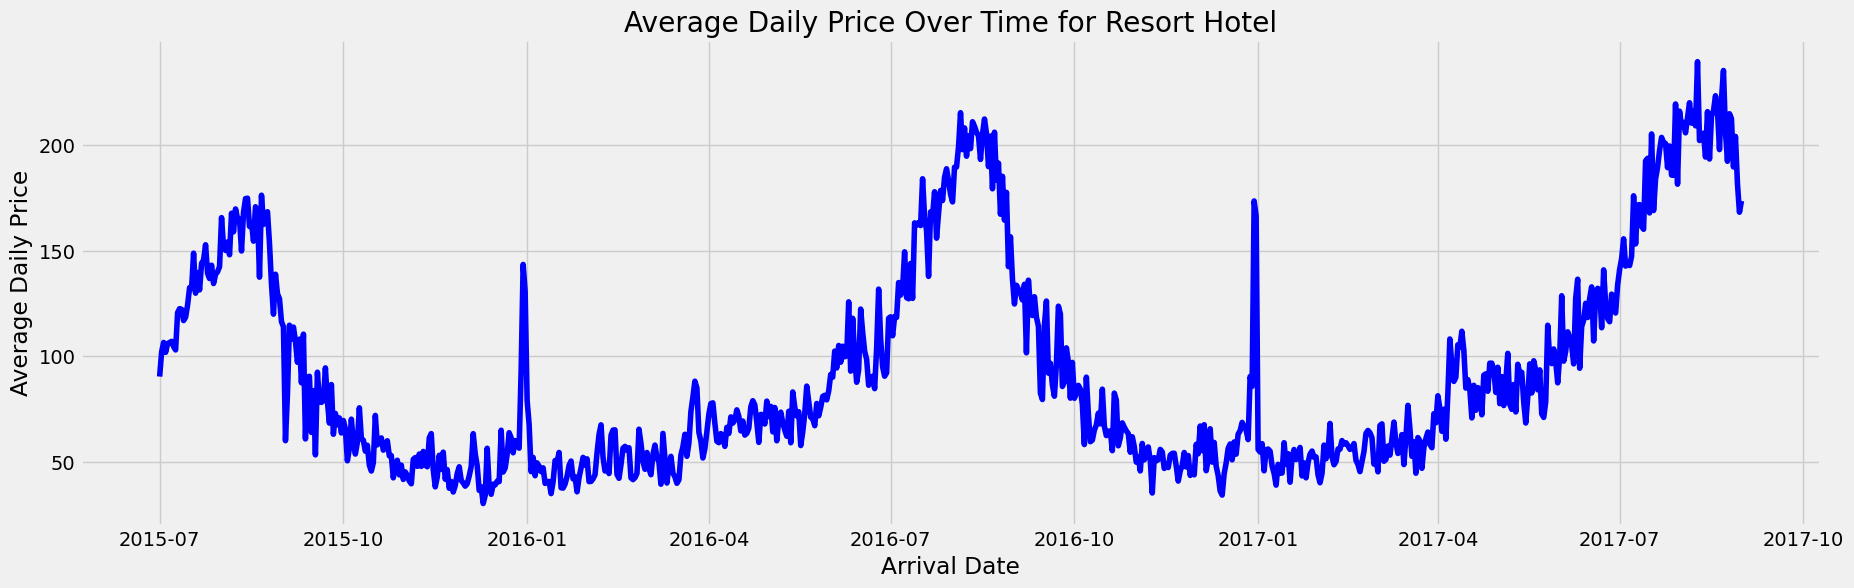

In [137]:
# Plot the new data set
plt.figure(figsize=(20,6))
plt.plot(aggregated_df['arrival_date'], aggregated_df['avg_daily_price'], color='b')
plt.title('Average Daily Price Over Time for Resort Hotel')
plt.xlabel('Arrival Date')
plt.ylabel('Average Daily Price')

This booking data for Resort Hotel show seasonality in the average daily prices as expected in tourism industry. 
Higher prices in summer months and Christmas/New Year.

In [138]:
# Check for missing values (shouldn't have any)
aggregated_df.isnull().sum() 

arrival_date       0
avg_daily_price    0
dtype: int64

In [139]:
# Check for duplicates
dups = aggregated_df.duplicated()
dups.sum()

# No dups!

0

## 4. Decompose the data's components

In [141]:
aggregated_df

,arrival_date,avg_daily_price
0,2015-07-01,90.293721
1,2015-07-02,101.975909
2,2015-07-03,106.468250
3,2015-07-04,101.784800
4,2015-07-05,105.960889
...,...,...
788,2017-08-27,189.582388
789,2017-08-28,204.031026
790,2017-08-29,181.666286
791,2017-08-30,168.132857


In [142]:
# Set the "Date" column as the index

from datetime import datetime

aggregated_df['datetime'] = pd.to_datetime(aggregated_df['arrival_date']) # Create a datetime column from "Date.""
aggregated_df = aggregated_df.set_index('datetime') # Set the datetime as the index of the dataframe.
aggregated_df.drop(['arrival_date'], axis=1, inplace=True) # Drop the "Date" column.
aggregated_df.head()

,avg_daily_price
datetime,
2015-07-01,90.293721
2015-07-02,101.975909
2015-07-03,106.468250
2015-07-04,101.784800
2015-07-05,105.960889


In [143]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(aggregated_df['avg_daily_price'], model='additive')

In [144]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

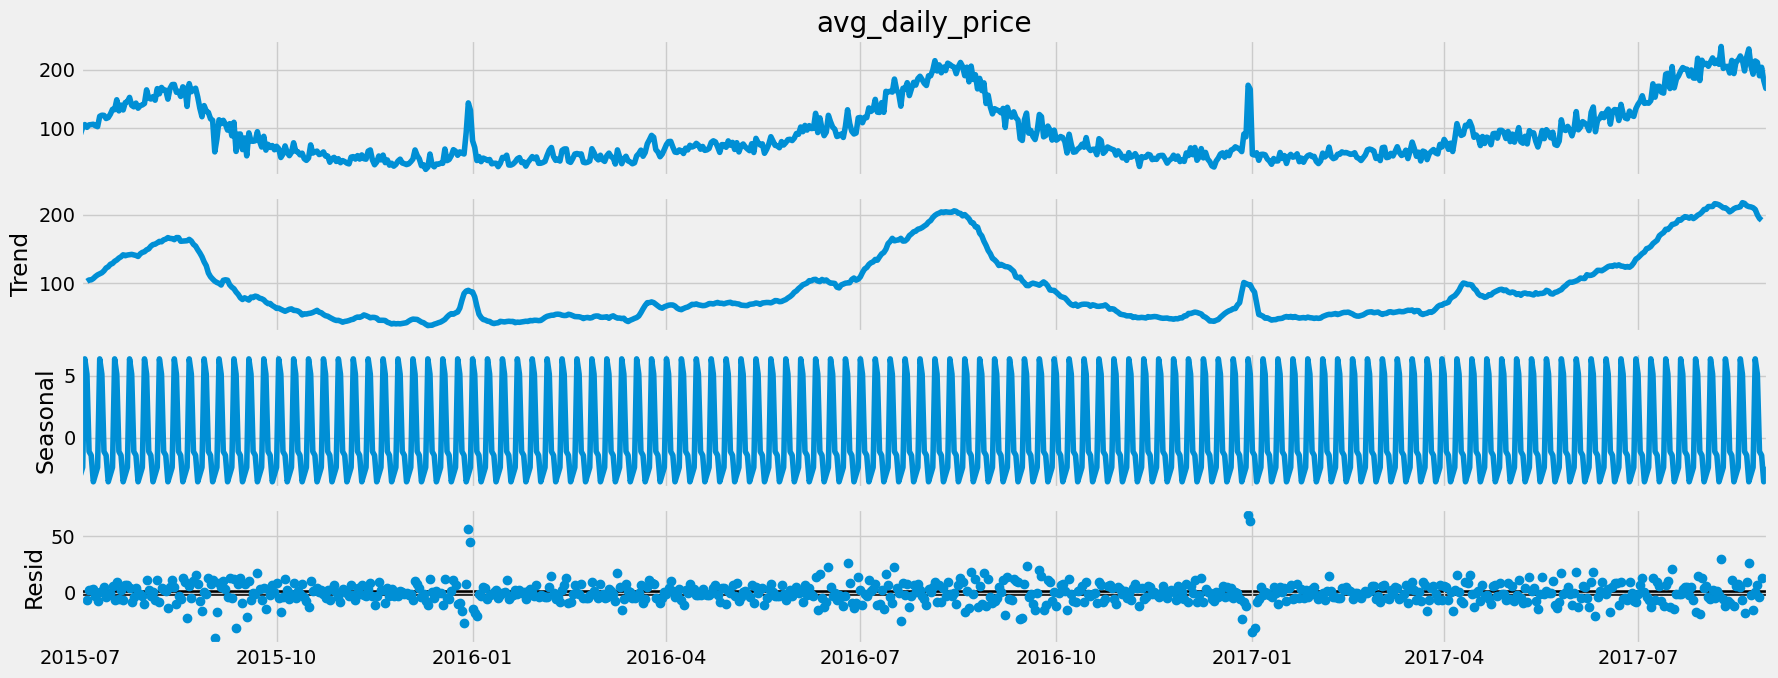

In [145]:
# Plot the separate components

decomposition.plot()
plt.show()

The trend is similar to the level (first line chart).
The trend lift in summer time and christmas/new eve, that make sense since in these two seasons more people go on holidays, so the demand is high and the prices replect that demand.
The third chart is the seasonality. Here the seasonal fluctuations are represented by a curve that changes at a regular interval.
Finally in the fourth chart is the noise or residuals, we can see here that there is much unexplained noise.

The analysis show that the data is non-stationary.

## 5. Testing for stationarity using Dickey-Fuller test

In [81]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(aggregated_df['avg_daily_price'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.631867
p-value                          0.863618
Number of Lags Used             21.000000
Number of Observations Used    771.000000
Critical Value (1%)             -3.438860
Critical Value (5%)             -2.865296
Critical Value (10%)            -2.568770
dtype: float64


Null Hypothesis:
Is the average daily price higher for the bookings in summer time?

Considering a significance level of 5% we can't reject the null hypopthesis (-2.865296, the critical value at 5%, is much smaller than -0.631867, the test statistic).
This means there is a unit root in data and the data is non-stationary.

## 6. Since the data in non-stationary, let's conduct a round of differencing 

In [147]:
data_diff = aggregated_df - aggregated_df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [148]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [149]:
data_diff.head()

,avg_daily_price
datetime,
2015-07-02,11.682188
2015-07-03,4.492341
2015-07-04,-4.683450
2015-07-05,4.176089
2015-07-06,0.476889


In [150]:
data_diff.columns

Index(['avg_daily_price'], dtype='object')

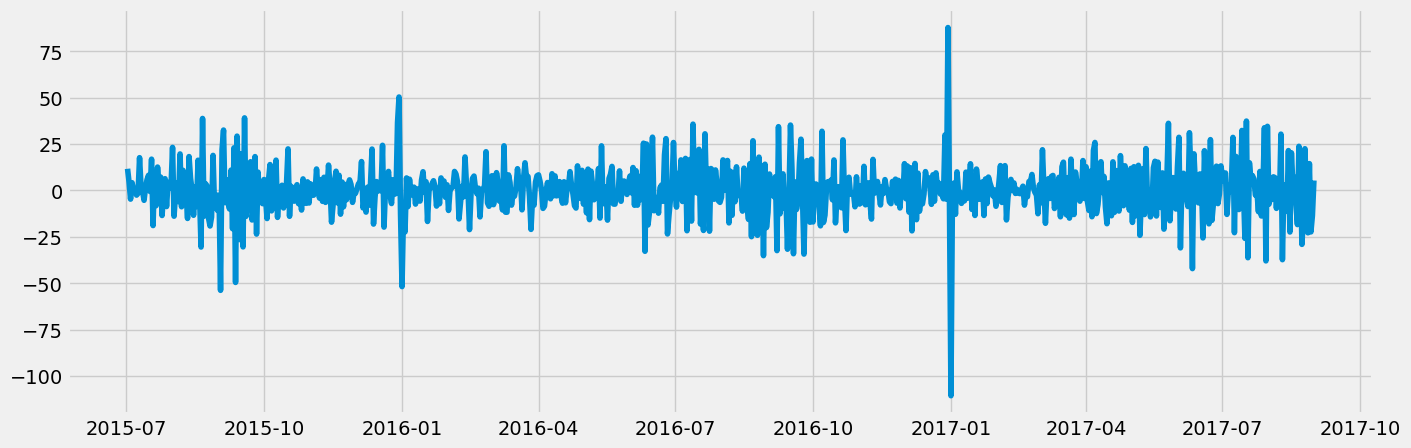

In [151]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [152]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.093745e+01
p-value                        9.480615e-20
Number of Lags Used            7.000000e+00
Number of Observations Used    7.840000e+02
Critical Value (1%)           -3.438718e+00
Critical Value (5%)           -2.865234e+00
Critical Value (10%)          -2.568737e+00
dtype: float64


The test statistic is now smaller than the critical value at the 5% significance level (-10.93745 < -2.865234). This means the data is stationary.

## 7. Check autocorrelations

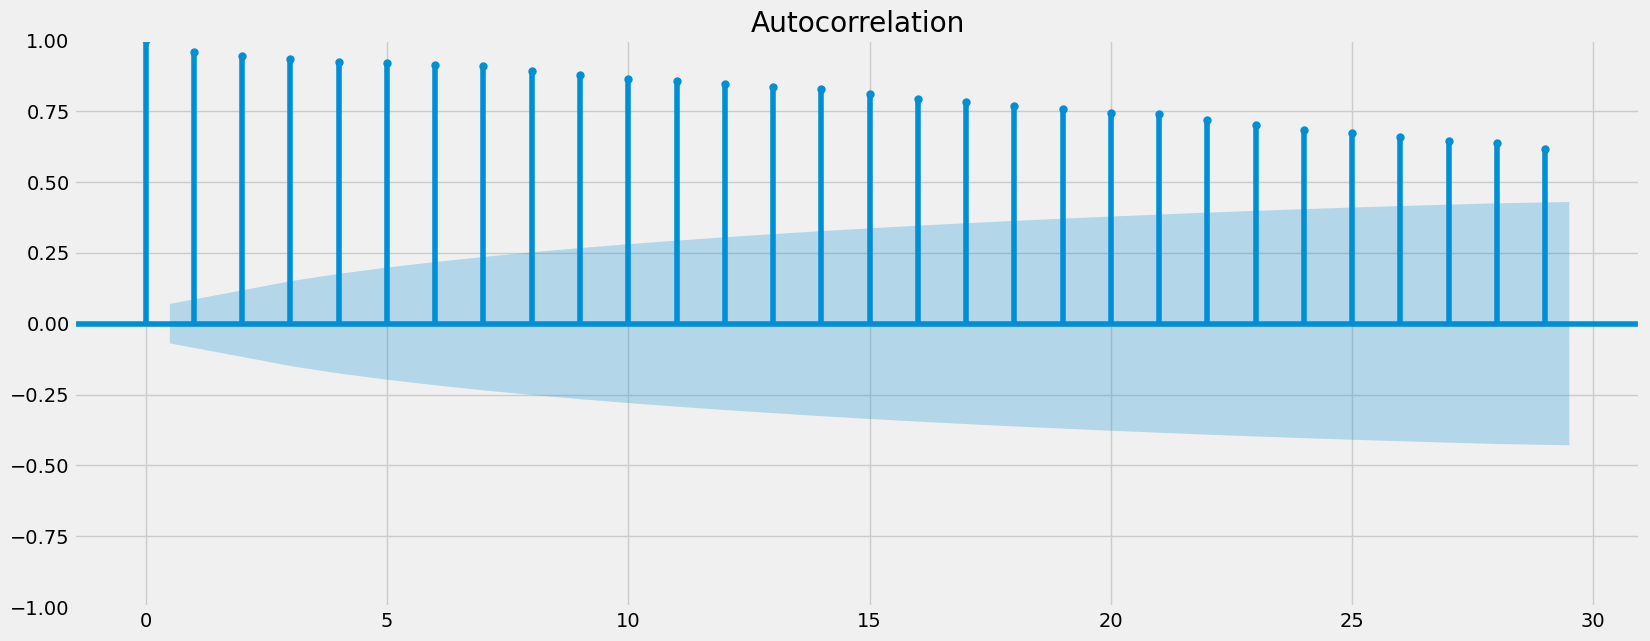

In [155]:
# Check out a plot of autocorrelations for the data before differencing

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(aggregated_df)
plt.show()

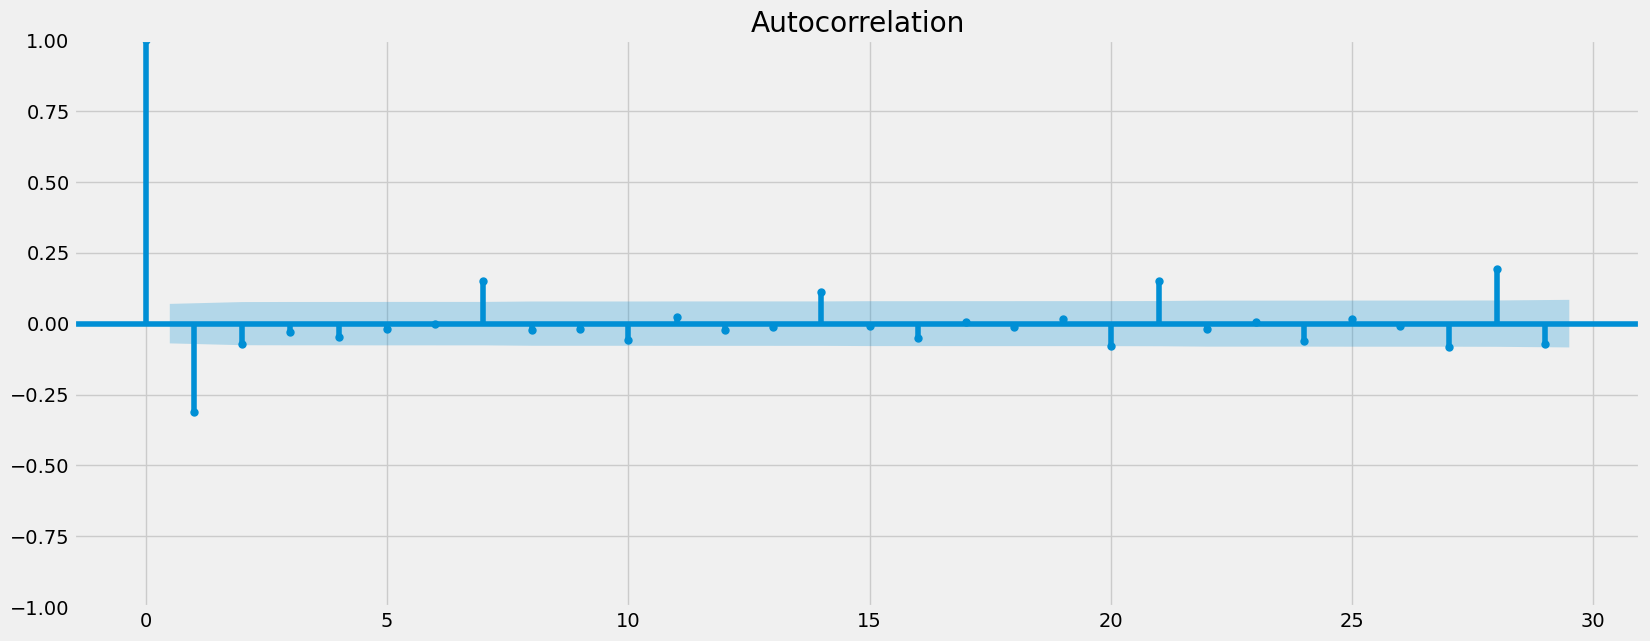

In [156]:
# Check out a plot of autocorrelations for the data after differencing
plot_acf(data_diff)
plt.show()

The correlation changed a lot before and after conducting the differencing.

In the first correlation graph, before conduct differencing, we can see all the lines above the blue edge of the confidence interval, this means the data has lags that are significantly correlated with each other. And we also can deduce the data is non-stationary.

In the second correlation graph we can conclude immediately the autocorrelation has improve. There are some lines above the blue edge that means there is still some stationarity, however it is important to highlight that the improvement was hudge.